# <a name="C10"> 1 - Import des packages</a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import decimal
import seaborn as sns
import statsmodels.api as sm

from decimal import Decimal
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection


# <a name="C10"> 2 - Import des données</a>

In [3]:
#drive.mount('/content/drive')

In [4]:

data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

## <a name="C10"> 2.1 - Check des données</a>

In [5]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

## <a name="C10"> 2.2 - Sélection des données à conserver</a>

In [6]:
cols = ['code', 'product_name', 'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'calcium_100g', 'iron_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g']

# ou data = pd.read_csv('drive/MyDrive/Colab Notebooks/fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False, usecols=cols)
data = data[cols]

In [7]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320749 non-null  object 
 1   product_name                 303010 non-null  object 
 2   ingredients_text             248962 non-null  object 
 3   additives_n                  248939 non-null  float64
 4   ingredients_from_palm_oil_n  248939 non-null  float64
 5   nutrition_grade_fr           221210 non-null  object 
 6   energy_100g                  261113 non-null  float64
 7   fat_100g                     243891 non-null  float64
 8   saturated-fat_100g           229554 non-null  float64
 9   carbohydrates_100g           243588 non-null  float64
 10  sugars_100g                  244971 non-null  float64
 11  fiber_100g                   200886 non-null  float64
 12  proteins_100g                259922 non-null  float64
 13 

# <a name="C2">3 - Nettoyage du jeu de données</a>

## <a name="C2">3.1 - Suppression des enregistrements inutiles</a>

Cette étape va permettre de supprimer les enregistrements qui n'ont que des valeurs nulles sur tous les nutriments

In [8]:
data.dropna(subset=['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'calcium_100g', 'iron_100g'], thresh=10, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131091 entries, 1 to 320768
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         131091 non-null  object 
 1   product_name                 130963 non-null  object 
 2   ingredients_text             130700 non-null  object 
 3   additives_n                  130700 non-null  float64
 4   ingredients_from_palm_oil_n  130700 non-null  float64
 5   nutrition_grade_fr           131085 non-null  object 
 6   energy_100g                  131091 non-null  float64
 7   fat_100g                     131091 non-null  float64
 8   saturated-fat_100g           131091 non-null  float64
 9   carbohydrates_100g           131091 non-null  float64
 10  sugars_100g                  131091 non-null  float64
 11  fiber_100g                   131091 non-null  float64
 12  proteins_100g                131091 non-null  float64
 13 

Suppression des enregistrements sans nom de produit.

In [9]:
data.dropna(subset=['product_name'], thresh=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130963 entries, 1 to 320768
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         130963 non-null  object 
 1   product_name                 130963 non-null  object 
 2   ingredients_text             130648 non-null  object 
 3   additives_n                  130648 non-null  float64
 4   ingredients_from_palm_oil_n  130648 non-null  float64
 5   nutrition_grade_fr           130957 non-null  object 
 6   energy_100g                  130963 non-null  float64
 7   fat_100g                     130963 non-null  float64
 8   saturated-fat_100g           130963 non-null  float64
 9   carbohydrates_100g           130963 non-null  float64
 10  sugars_100g                  130963 non-null  float64
 11  fiber_100g                   130963 non-null  float64
 12  proteins_100g                130963 non-null  float64
 13 

## <a name="C2">3.2 - Doublons</a>

In [10]:
doublons = data.loc[data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'calcium_100g', 'iron_100g']].duplicated(keep=False),:]
doublons

,code,product_name,ingredients_text,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
1,0000000004530,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,0.000,0.00129,NaN,14.0
2,0000000004559,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.071,0.00129,NaN,0.0
27,0000000018395,Roasted Salted Black Pepper Cashews,"Whole cashews, sunflower oil, salt, black pepper",0.0,0.0,d,2372.0,46.67,8.33,30.00,6.67,3.3,16.67,1.01600,0.400,0.067,0.00600,NaN,16.0
28,0000000018401,Thai Curry Roasted Cashews,"Cashews, curry seasoning (salt, maltodextrin, ...",1.0,0.0,d,2372.0,43.33,6.67,30.00,6.67,3.3,16.67,1.35382,0.533,0.067,0.00600,NaN,15.0
65,0000000032117,Tricolor Tortellini,"Egg pasta (refined durum semolina wheat flour,...",0.0,0.0,c,1611.0,9.23,3.08,60.00,1.54,3.1,13.85,1.13284,0.446,0.123,0.00166,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320663,956088003170,Blueberry Chia Buckwheat Muesli,"Gluten-free oats, organic honey, coconut, blue...",0.0,0.0,c,1690.0,10.53,4.39,66.67,15.79,8.8,12.28,0.04572,0.018,0.070,0.00474,NaN,7.0
320664,95656335,Chipotle Peppers In Adobo Sauce,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,0.0,c,280.0,0.00,0.00,16.67,6.67,10.0,0.00,3.21818,1.267,0.000,0.00240,NaN,6.0
320665,95659305,Dal Makhani,"Tomato, black gram, water, milk cream, cottons...",0.0,0.0,b,502.0,5.33,1.00,13.33,0.00,2.0,4.67,1.37160,0.540,0.027,0.00120,NaN,2.0
320738,9780803738782,Organic Z Bar,"Organic oat blend (organic rolled oats, organi...",1.0,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.3,5.56,0.95250,0.375,0.556,0.00500,NaN,11.0


In [11]:
doublons_indexes = data.loc[data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'calcium_100g', 'iron_100g']].duplicated(keep=False),:].index
data.drop(doublons_indexes, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71224 entries, 3 to 320742
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         71224 non-null  object 
 1   product_name                 71224 non-null  object 
 2   ingredients_text             70964 non-null  object 
 3   additives_n                  70964 non-null  float64
 4   ingredients_from_palm_oil_n  70964 non-null  float64
 5   nutrition_grade_fr           71218 non-null  object 
 6   energy_100g                  71224 non-null  float64
 7   fat_100g                     71224 non-null  float64
 8   saturated-fat_100g           71224 non-null  float64
 9   carbohydrates_100g           71224 non-null  float64
 10  sugars_100g                  71224 non-null  float64
 11  fiber_100g                   71224 non-null  float64
 12  proteins_100g                71224 non-null  float64
 13  salt_100g      

## <a name="C2">3.3 - Outliers</a>

### <a name="C2">3.3.1 - Valeurs aberrantes/atypiques de chaque nutriment</a>

In [95]:
import ipywidgets as widgets
from ipywidgets import interact

nutriment = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'calcium_100g', 'iron_100g']

def messageNutriment(nutriment):
    print("     Conclusion:")
    if nutriment == 'energy_100g':
        print("")
    if nutriment == 'fat_100g':
        print("     Ce ne sont pas des valeurs aberrantes mais des valeurs atypiques car ce sont des huiles principalement. Pas d'outliers > 100g")
    if nutriment == 'saturated-fat_100g':
        print("     Pas de données aberrantes sur la quantité totale mais quelques unes sur la comparaison par rapport au fat_100g car saturated-fat_100g est un sous ensemble. Donc on corrige en prennant la valeur de fat_100g")
    if nutriment == 'carbohydrates_100g':
        print("Il y a une valeur aberrante (> 100). On peut donc la recalculer par rapport à la formule du calcul de l'apport énergétique d'un aliment: E KJ = (37 x lipides) + (29 x alcool) + (17 x protéines) + (17 x glucides sauf polyols) + (13 x acides organiques) + (10 x polyols) + (8 x fibres)")
    if nutriment == 'sugars_100g':
        print("     On s'aperçoit qu'il y a des valeurs en dessous de 0. Les valeurs sont fausses, ils s'agit de la valeur fat_100g à laquelle on a rajouté de le signe -. Les valeurs de carbohydrates_100g étant faible on peut mettre ces valeurs à 0.")
        print("     Regardons si nous avons des veleurs de sugars_100g > carbohydrates_100g: ")
        data.loc[data['sugars_100g'] > data['carbohydrates_100g'], :]
        print("     Quelques données aberrantes sur la comparaison par rapport au carbohydrates_100g car sugars_100g est un sous ensemble. Donc on corrige en prennant la valeur de carbohydrates_100g")
    if nutriment == 'fiber_100g':
        print("")
    if nutriment == 'proteins_100g':
        print("     On s'aperçoit qu'il y a des valeurs en dessous de 0, regardons à quoi elles ressemblent.")
        data.loc[data['proteins_100g'] < 0, :]
        print("     Les valeurs sont fausses, ils s'agit de la valeur fat_100g à laquelle on a rajouté de le signe -. Les valeurs de carbohydrates_100g étant faible on peut mettre ces valeurs à 0.")
        print("     Pour les outiliers, ce ne sont pas des valeurs aberrantes mais des valeurs atypiques car ce sont des produits à base de viande ou de noix donc contenant des protéines.")
    if nutriment == 'salt_100g':
        print("Pour les outliers, ce sont presques toutes des valeurs aberrantes. La donnée à certainement été mesurée en mg et laissée en g. La plus grande teneur en sel est : le sel non iodé non fluoré	39 100,00 mg. On va donc diviser ces valeurs (> 39g) par 1000")
    if nutriment == 'sodium_100g':
        print("Pour les outliers, ce sont presques toutes des valeurs aberrantes. La donnée à certainement été mesurée en mg et laissée en g. On va donc diviser ces valeurs par 1000")
    if nutriment == 'calcium_100g':
        print("Pour les outliers, ce sont presques toutes des valeurs aberrantes. La donnée à certainement été mesurée en mg et laissée en g. On va donc diviser ces valeurs par 1000")
    if nutriment == 'iron_100g':
        print("Pour les outliers, ce sont presques toutes des valeurs aberrantes. La donnée à certainement été mesurée en mg et laissée en g. On va donc diviser ces valeurs par 1000")
        print("On s'aperçoit qu'il y a des valeurs en dessous de 0. Il s'agit probablement d'une donnée calculée mal arrondie. On va donner la mettre à 0")

def locData(colonne, max):
    print("     Données supérieures aux max({max}):")
    dataTo = data.loc[data[colonne] > max, :]
    print(dataTo.head(10))
    print("     Données supérieures à 100g:")
    dataTo = data.loc[data[colonne] > 100, :]
    print(dataTo.head(10))
    print("     Données inférieures à 0g:")
    dataTo = data.loc[data[colonne] < 0, :]
    print(dataTo.head(10))

def f(x):
    # Boite à moustache
    plt.figure(figsize=[10,6])
    plt.title(f"Boite à moustache - {x}")
    data.boxplot(column=x, vert=False)
    plt.show()

    q1 = round(data[x].quantile(0.25),2)
    q3 = round(data[x].quantile(0.75),2)
    moustacheDroite = (q3 - q1) * 1.5
    max = q3 + moustacheDroite
    print(f"     max: {max}")
    locData(x, max)
    messageNutriment(x)
   
interact(f, x=nutriment)

# Partie corrections des outliers vu dans la fonction messageNutriment
# saturated-fat_100g
data.loc[data['saturated-fat_100g'] > data['fat_100g'], 'saturated-fat_100g'] = data['fat_100g']
# carbohydrates_100g
data.loc[data['carbohydrates_100g'] > 110, 'carbohydrates_100g'] = (data['energy_100g'] - data['fat_100g'] * 37 - data['proteins_100g'] * 17 - data['fiber_100g']) / 17
# sugars_100g
data.loc[data['sugars_100g'] < 0, 'sugars_100g'] = 0
data.loc[data['sugars_100g'] > data['carbohydrates_100g'], 'sugars_100g'] = data['carbohydrates_100g']
# proteins_100g
data.loc[data['proteins_100g'] < 0, 'proteins_100g'] = 0
# salt_100g
data.loc[data['salt_100g'] > 39, 'salt_100g'] = data['salt_100g'] / 1000
# sodium_100g
data.loc[data['sodium_100g'] > 20, 'sodium_100g'] = data['sodium_100g'] / 1000
# calcium_100g
data.loc[data['calcium_100g'] > 1, 'calcium_100g'] = data['calcium_100g'] / 1000
# iron_100g
data.loc[data['iron_100g'] > 1, 'iron_100g'] = data['iron_100g'] / 1000
data.loc[data['iron_100g'] < 0, 'iron_100g'] = 0

interactive(children=(Dropdown(description='x', options=('energy_100g', 'fat_100g', 'saturated-fat_100g', 'car…

### <a name="C2">3.3.2 - Composition totale</a>

In [14]:
data['Composition totale'] = data['fat_100g'] + data['carbohydrates_100g'] + data['fiber_100g'] + data['proteins_100g']
print(data.loc[(data['fat_100g'] + data['carbohydrates_100g'] + data['fiber_100g'] + data['proteins_100g']) > 100,:])

                 code                                       product_name  \
7       0000000016124                                     Organic Muesli   
16      0000000018050                                  Organic Hazelnuts   
21      0000000018289              Antioxidant Mix - Berries & Chocolate   
22      0000000018319          Organic Quinoa Coconut Granola With Mango   
26      0000000018388                Organic Unswt Berry Coconut Granola   
...               ...                                                ...   
317687  8938505214740  Tien Giange 80% Single Origin Vietnam Dark Cho...   
317688  8938505214757           Treasure Island 3/4 Cocoa Dark Chocolate   
317690   893869000420  Sahale Snacks, Pistachios Glazed Mix, Pomegranate   
319781  9311931199017                 Indocafe, 5 In 1 Creamy Cappuccino   
320647  9556390178160                                     Sugar Crackers   

                                         ingredients_text  additives_n  \
7       Org o

Pour toute ligne dont la composition est supérieure à 100g chaque valeur de poids sera recalculé par une règle de 3 afin que la composition totale soit <= 100g

In [18]:
data.loc[data['Composition totale'] > 100, 'fat_100g'] = (((data['fat_100g'] * 10000) / data['Composition totale']) // 1) / 100
data.loc[data['Composition totale'] > 100, 'sugars_100g'] = (((data['sugars_100g'] * 10000) / data['Composition totale']) // 1) / 100
data.loc[data['Composition totale'] > 100, 'saturated-fat_100g'] = (((data['saturated-fat_100g'] * 10000) / data['Composition totale']) // 1) / 100
data.loc[data['Composition totale'] > 100, 'carbohydrates_100g'] = (((data['carbohydrates_100g'] * 10000) / data['Composition totale']) // 1) / 100
data.loc[data['Composition totale'] > 100, 'fiber_100g'] = (((data['fiber_100g'] * 10000) / data['Composition totale']) // 1) / 100
data.loc[data['Composition totale'] > 100, 'proteins_100g'] = (((data['proteins_100g'] * 10000) / data['Composition totale']) // 1) / 100

In [19]:
print(data.loc[(data['fat_100g'] + data['carbohydrates_100g'] + data['fiber_100g'] + data['proteins_100g']) > 100,:])

Empty DataFrame
Columns: [code, product_name, ingredients_text, additives_n, ingredients_from_palm_oil_n, nutrition_grade_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, calcium_100g, iron_100g, fruits-vegetables-nuts_100g, nutrition-score-fr_100g, Composition totale]
Index: []


### <a name="C2">3.3.3 - energy_100g</a>

Cette variable est traitée à part car elle dépend des proportions des nutriments, il faut donc avoir traité ceux-ci en premier.

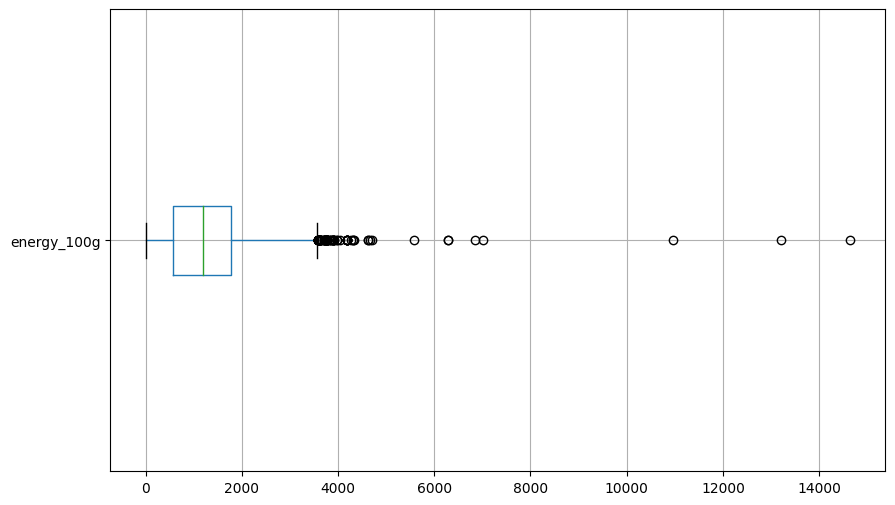

In [20]:
# Boite à moustache energy_100g
plt.figure(figsize=[10,6])
data.boxplot(column="energy_100g", vert=False)
plt.title(f"Boite à moustache energy_100g")
plt.show()

Pour 100 grammes d’aliment

Cet apport énergétique en KJ est calculé selon la formule :

E KJ = (37 x lipides) + (29 x alcool) + (17 x protéines) + (17 x glucides sauf polyols) + (13 x acides organiques) + (10 x polyols) + (8 x fibres)

Donc le maximum d'apport énergétique serait 100g de lipides. Soit 37 * 100 = 3700 KJ. Ce sont les huiles principalement.

In [21]:
print(data.loc[data['energy_100g'] > 3700,:])

                 code                                       product_name  \
5889    0011150273107                               Vegetable Shortening   
14385   0018894004639                                Bigy, Cajun Hot Mix   
14399   0018894004806                                      Honey Peanuts   
35143   0037842017682                              Dried Habanero Chiles   
35308   0038233241334                                         Lemon Cake   
45595   0041331034012                                       Refined Lard   
46967   0041390030512                              Instant Aka Miso Soup   
49297   0041497132584                                     Roasted Pecans   
49444   0041497156412                                        Coconut Oil   
55851   0043000013083                    Maxwell House, Creme Cappuccino   
55852   0043000013090              Cafe Collection Coffee & Milk Creamer   
55878   0043000032893                              Coffee & Milk Creamer   
55961   0043

In [22]:
data.loc[data['energy_100g'] > 3700, 'energy_100g'] = data['fat_100g'] * 37 + data['proteins_100g'] * 17 + data['fiber_100g'] * 8
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71224 entries, 3 to 320742
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         71224 non-null  object 
 1   product_name                 71224 non-null  object 
 2   ingredients_text             70964 non-null  object 
 3   additives_n                  70964 non-null  float64
 4   ingredients_from_palm_oil_n  70964 non-null  float64
 5   nutrition_grade_fr           71218 non-null  object 
 6   energy_100g                  71224 non-null  float64
 7   fat_100g                     71224 non-null  float64
 8   saturated-fat_100g           71224 non-null  float64
 9   carbohydrates_100g           71224 non-null  float64
 10  sugars_100g                  71224 non-null  float64
 11  fiber_100g                   71224 non-null  float64
 12  proteins_100g                71224 non-null  float64
 13  salt_100g      

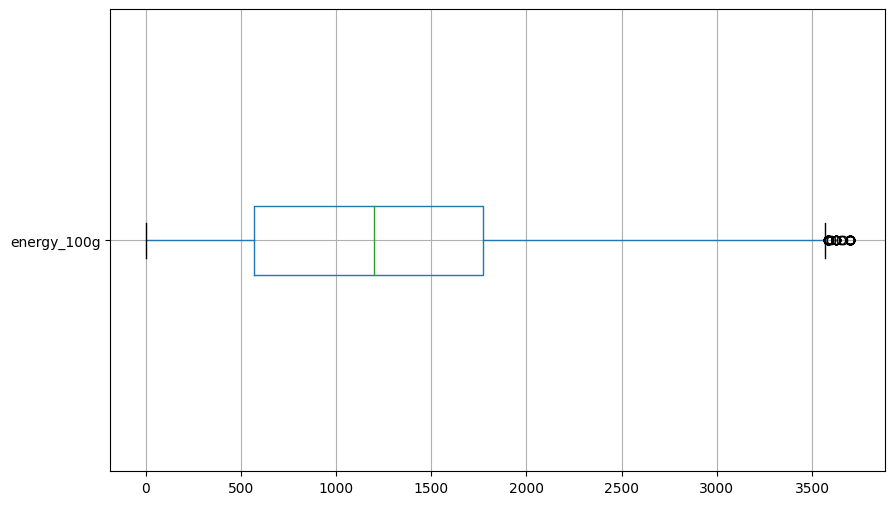

In [23]:
# Boite à moustache proteins_100g
plt.figure(figsize=[10,6])
plt.title(f"Boite à moustache proteins_100g")
data.boxplot(column="energy_100g", vert=False)
plt.show()

In [24]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,Composition totale
count,70964.000000,70964.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,10.000000,71218.000000,71224.000000
mean,2.111507,0.001705,1209.039586,13.079577,4.584162,35.028448,15.189700,2.838770,7.538897,1.217756,0.492833,0.073721,0.001795,13.000000,9.550366,59.705398
std,2.665797,0.041598,710.928757,13.755872,6.188989,25.719219,17.976536,3.829446,7.290690,2.254758,1.004687,0.117041,0.005574,18.135294,8.761480,33.475716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000
25%,0.000000,0.000000,569.000000,1.707500,0.000000,11.150000,1.770000,0.000000,2.700000,0.190500,0.076000,0.000000,0.000000,0.000000,1.000000,28.867500
50%,1.000000,0.000000,1197.000000,8.960000,2.210000,30.040000,6.670000,1.700000,5.710000,0.762000,0.301000,0.039000,0.001125,0.000000,10.000000,58.730000
75%,3.000000,0.000000,1774.000000,21.130000,6.930000,57.140000,24.712500,3.600000,10.420000,1.427480,0.563250,0.100000,0.002400,25.000000,16.000000,92.970000
max,31.000000,2.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,72.500000,100.000000,38.846760,20.000000,1.000000,0.892860,50.000000,40.000000,233.370000


## <a name="C2">3.4 - Données manquantes</a>

### <a name="C2">3.4.1 - Imputation par 0</a>

In [25]:
data['fruits-vegetables-nuts_100g'] = data['fruits-vegetables-nuts_100g'].fillna(0)

In [26]:
data.loc[data['ingredients_from_palm_oil_n'].isnull() , 'ingredients_from_palm_oil_n'] = 0
# data.loc[data['ingredients_that_may_be_from_palm_oil_n'].isnull() , 'ingredients_that_may_be_from_palm_oil_n'] = 0

In [27]:
data.isna().sum()

code                             0
product_name                     0
ingredients_text               260
additives_n                    260
ingredients_from_palm_oil_n      0
nutrition_grade_fr               6
energy_100g                      0
fat_100g                         0
saturated-fat_100g               0
carbohydrates_100g               0
sugars_100g                      0
fiber_100g                       0
proteins_100g                    0
salt_100g                        0
sodium_100g                      0
calcium_100g                     0
iron_100g                        0
fruits-vegetables-nuts_100g      0
nutrition-score-fr_100g          6
Composition totale               0
dtype: int64

### <a name="C2">3.4.2 - Imputation méthode/calcul métier</a>

In [28]:
# n = categorie concernée (sucre, calorie etc.) x = valeur de la catégorie
def pointsn(n, x):
  x = float(x)
  if n == "sucre":
    k = 4.5
  if n == "énergie":
    k = 335
  if n == "sodium":
    k = 90
  if n == "ags":
    k = 1

  z = 0
  if x > k:
    z += 1
  if x > k * 2:
    z += 1
  if x > k * 3:
    z += 1
  if x > k * 4:
    z += 1
  if x > k * 5:
    z += 1
  if x > k * 6:
    z += 1
  if x > k * 7:
    z += 1
  if x > k * 8:
    z += 1
  if x > k * 9:
    z += 1
  if x > k * 10:
    z += 1
  return z

In [29]:
# p = categorie concernée (sucre, calorie etc.) x = valeur de la catégorie
def pointsp(p, x):
  x = float(x)
  if p == "fibre":
    k = 0.95
  if p == "protéine":
    k = 1.6
  z = 0
  if p != "autres":
    if x > k:
      z += 1
    if x > k * 2:
      z += 1
    if x > k * 3:
      z += 1
    if x > k * 4:
      z += 1
    if x > k * 5:
      z += 1
  else:
    if x > 40:
      z += 1
    if x > 60:
      z += 1
    if x > 80:
      z += 3
  return z

In [30]:
def scoren(sucre, energie, sodium, ags):
  t = 0
  su = pointsn("sucre", sucre)
  en = pointsn("énergie", energie)
  so = pointsn("sodium", sodium)
  ag = pointsn("ags", ags)
  t = su + en + so + ag
#  print(f"{su} +  {en} + {so} + {ag}")
  return t

In [31]:
def scorep(proteine, fibre, fruits):
  autres = fruits
  t = 0
  pr = pointsp("protéine", proteine)
  fi = pointsp("fibre", fibre)
  au = pointsp("autres", autres)
#  print(f"{pr} +  {fi} + {au}")
  t = pr + fi  + au
  return t

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71224 entries, 3 to 320742
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         71224 non-null  object 
 1   product_name                 71224 non-null  object 
 2   ingredients_text             70964 non-null  object 
 3   additives_n                  70964 non-null  float64
 4   ingredients_from_palm_oil_n  71224 non-null  float64
 5   nutrition_grade_fr           71218 non-null  object 
 6   energy_100g                  71224 non-null  float64
 7   fat_100g                     71224 non-null  float64
 8   saturated-fat_100g           71224 non-null  float64
 9   carbohydrates_100g           71224 non-null  float64
 10  sugars_100g                  71224 non-null  float64
 11  fiber_100g                   71224 non-null  float64
 12  proteins_100g                71224 non-null  float64
 13  salt_100g      

In [33]:
data['Nutrition Score calculé'] = 0

In [34]:
nbLignes = len(data)
for i in range(nbLignes - 1):
  n = scoren(data.iloc[i]['sugars_100g'], data.iloc[i]['energy_100g'], data.iloc[i]['sodium_100g'], data.iloc[i]['saturated-fat_100g'])
  p = scorep(data.iloc[i]['proteins_100g'], data.iloc[i]['fiber_100g'], data.iloc[i]['fruits-vegetables-nuts_100g'])
#  print(f"n: {n} - p: {p} = {n - p}")
  data.iloc[i, data.columns.get_loc('Nutrition Score calculé')] = n - p 

In [35]:
data.loc[data['nutrition-score-fr_100g'].isnull() , 'nutrition-score-fr_100g'] = data['Nutrition Score calculé']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71224 entries, 3 to 320742
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         71224 non-null  object 
 1   product_name                 71224 non-null  object 
 2   ingredients_text             70964 non-null  object 
 3   additives_n                  70964 non-null  float64
 4   ingredients_from_palm_oil_n  71224 non-null  float64
 5   nutrition_grade_fr           71218 non-null  object 
 6   energy_100g                  71224 non-null  float64
 7   fat_100g                     71224 non-null  float64
 8   saturated-fat_100g           71224 non-null  float64
 9   carbohydrates_100g           71224 non-null  float64
 10  sugars_100g                  71224 non-null  float64
 11  fiber_100g                   71224 non-null  float64
 12  proteins_100g                71224 non-null  float64
 13  salt_100g      

### <a name="C2">3.4.3 - Imputation par KNN-Imputer</a>

In [36]:
data.isna().sum()

code                             0
product_name                     0
ingredients_text               260
additives_n                    260
ingredients_from_palm_oil_n      0
nutrition_grade_fr               6
energy_100g                      0
fat_100g                         0
saturated-fat_100g               0
carbohydrates_100g               0
sugars_100g                      0
fiber_100g                       0
proteins_100g                    0
salt_100g                        0
sodium_100g                      0
calcium_100g                     0
iron_100g                        0
fruits-vegetables-nuts_100g      0
nutrition-score-fr_100g          0
Composition totale               0
Nutrition Score calculé          0
dtype: int64

<Axes: ylabel='nutrition_grade_fr'>

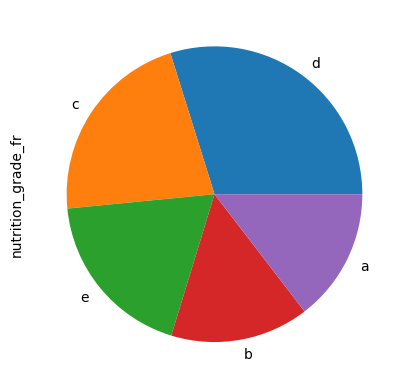

In [37]:
data["nutrition_grade_fr"].value_counts().plot.pie()

In [38]:
df = data[['sugars_100g', 'sodium_100g', 'salt_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr']]
dg = data[['code', 'product_name', 'additives_n', 'ingredients_from_palm_oil_n', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g', 'Nutrition Score calculé']]
mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict &amp; Removing nan    
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    #Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    #Minmaxscaler and KNN imputation 
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df


#Imputation
df = imputation(df,['nutrition_grade_fr'])

In [39]:
df.isna().sum()

sugars_100g                    0
sodium_100g                    0
salt_100g                      0
energy_100g                    0
fat_100g                       0
carbohydrates_100g             0
saturated-fat_100g             0
proteins_100g                  0
fiber_100g                     0
fruits-vegetables-nuts_100g    0
nutrition_grade_fr             0
dtype: int64

In [40]:
data_final = pd.concat([df, dg], axis=1)
data_final.head()

,sugars_100g,sodium_100g,salt_100g,energy_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,code,product_name,additives_n,ingredients_from_palm_oil_n,calcium_100g,iron_100g,nutrition-score-fr_100g,Nutrition Score calculé
3,4,0,1,2540,57,18,5,18,7,0,d,0000000016087,Organic Salted Nut Mix,0.0,0.0,0.143,0.00514,12.0,2
7,16,0,0,1833,19,58,5,14,9,0,c,0000000016124,Organic Muesli,2.0,0.0,0.062,0.00422,7.0,2
12,3,1,2,2230,37,37,5,17,7,0,d,0000000016872,Zen Party Mix,1.0,0.0,0.133,0.00360,12.0,0
16,3,0,0,2632,57,17,3,13,10,0,b,0000000018050,Organic Hazelnuts,0.0,0.0,0.107,0.00450,0.0,0
19,2,0,0,1096,6,67,1,17,9,0,a,0000000018227,Organic Oat Groats,0.0,0.0,0.048,0.00429,-6.0,-6


In [41]:
data_final.isna().sum()

sugars_100g                      0
sodium_100g                      0
salt_100g                        0
energy_100g                      0
fat_100g                         0
carbohydrates_100g               0
saturated-fat_100g               0
proteins_100g                    0
fiber_100g                       0
fruits-vegetables-nuts_100g      0
nutrition_grade_fr               0
code                             0
product_name                     0
additives_n                    260
ingredients_from_palm_oil_n      0
calcium_100g                     0
iron_100g                        0
nutrition-score-fr_100g          0
Nutrition Score calculé          0
dtype: int64

# <a name="C2">4 - Analyse du jeu de données</a>

## <a name="C2">4.1 - Analyse univariée</a>

In [42]:
data_final.describe()

,sugars_100g,sodium_100g,salt_100g,energy_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts_100g,additives_n,ingredients_from_palm_oil_n,calcium_100g,iron_100g,nutrition-score-fr_100g,Nutrition Score calculé
count,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000,70964.000000,71224.000000,71224.000000,71224.000000,71224.000000,71224.000000
mean,15.197433,0.409497,1.196226,1209.039593,13.081517,35.035985,4.587541,7.547217,2.854305,0.001825,2.111507,0.001699,0.073721,0.001795,9.549730,4.439866
std,17.971779,1.065209,2.280708,710.928750,13.762171,25.716644,6.190466,7.290850,3.846078,0.255508,2.665797,0.041522,0.117041,0.005574,8.761487,7.491296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-10.000000
25%,2.000000,0.000000,0.000000,569.000000,2.000000,11.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
50%,7.000000,0.000000,1.000000,1197.000000,9.000000,30.000000,2.000000,6.000000,2.000000,0.000000,1.000000,0.000000,0.039000,0.001125,10.000000,2.000000
75%,25.000000,1.000000,1.000000,1774.000000,21.000000,57.000000,7.000000,10.000000,4.000000,0.000000,3.000000,0.000000,0.100000,0.002400,16.000000,10.000000
max,100.000000,20.000000,39.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,72.000000,50.000000,31.000000,2.000000,1.000000,0.892860,40.000000,27.000000


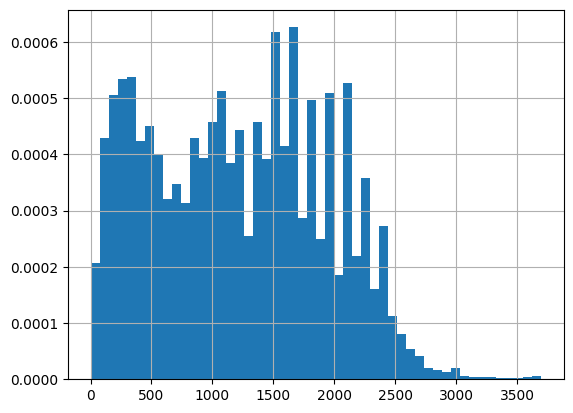

In [43]:
# Histogramme
data_final["energy_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de energy_100g")
plt.show()

La distribution ne peut être caractérisée, il semble y avoir une superposition de distribution. On pourrait pousser l'analyse en réalisant une ANOVA avec le nutrition score.

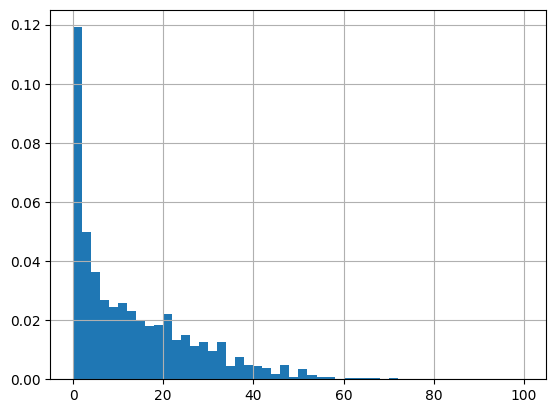

In [44]:
# Histogramme
data_final["fat_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de fat_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

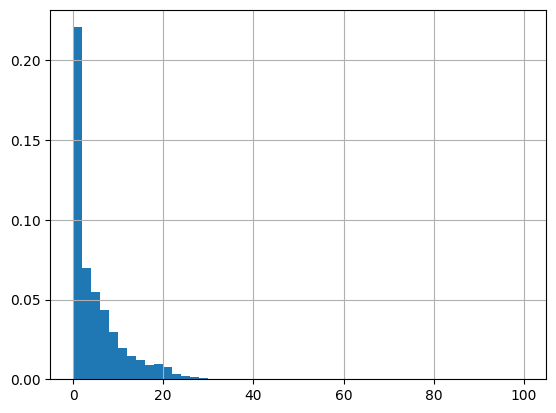

In [45]:
# Histogramme
data_final["saturated-fat_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de saturated-fat_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

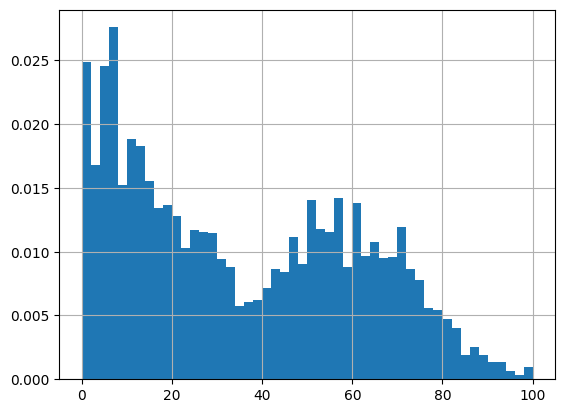

In [46]:
# Histogramme
data_final["carbohydrates_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de carbohydrates_100g")
plt.show()

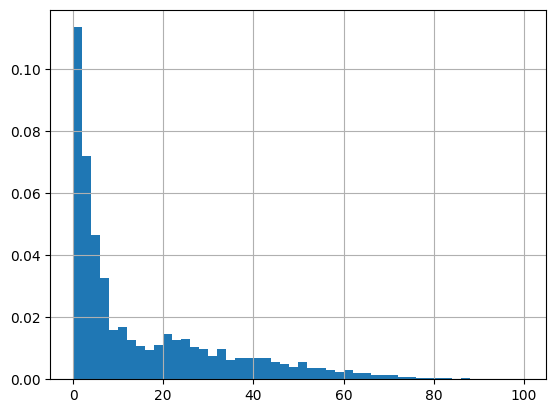

In [47]:
# Histogramme
data_final["sugars_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de sugars_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

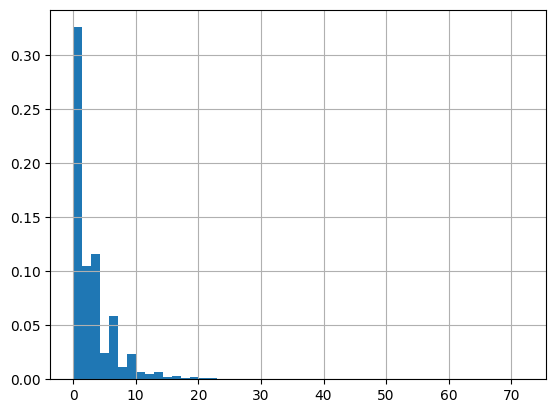

In [48]:
# Histogramme
data_final["fiber_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de fiber_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

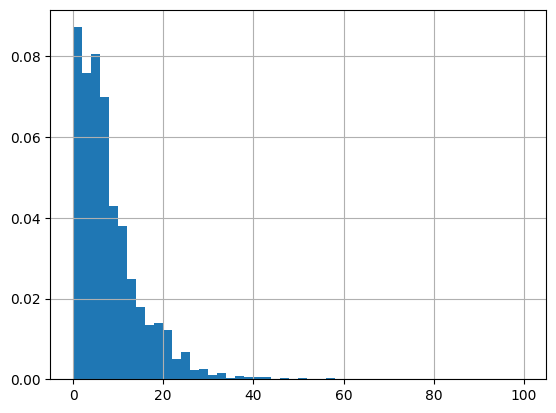

In [49]:
# Histogramme
data_final["proteins_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de proteins_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

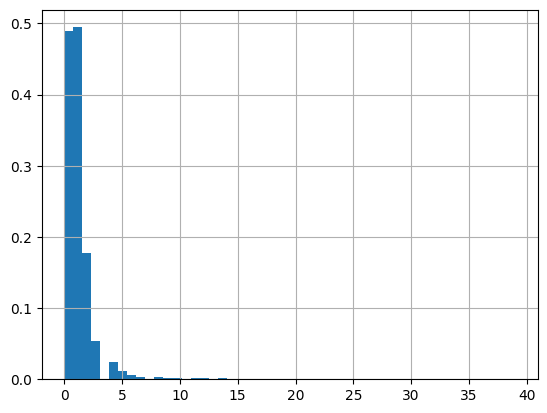

In [50]:
# Histogramme
data_final["salt_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de salt_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

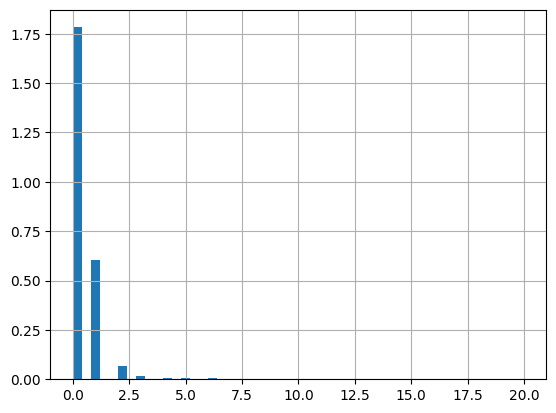

In [51]:
# Histogramme
data_final["sodium_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de sodium_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

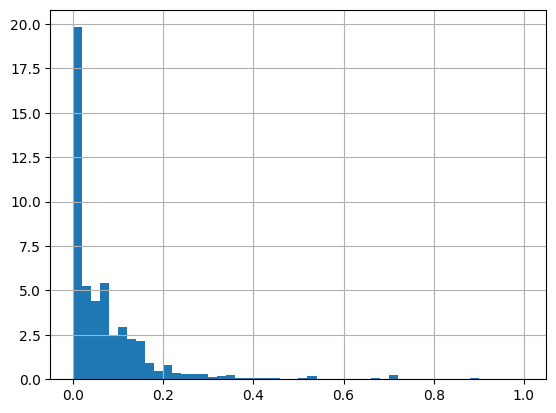

In [52]:
# Histogramme
data_final["calcium_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de calcium_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

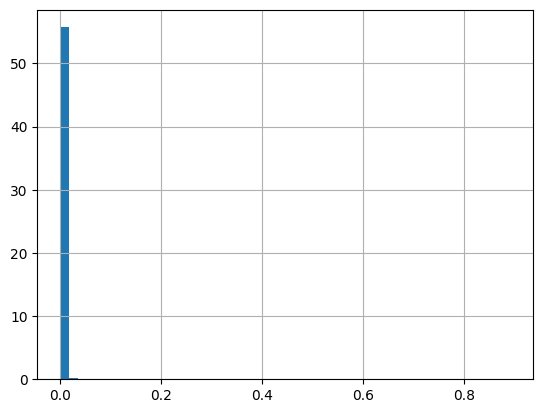

In [53]:
# Histogramme
data_final["iron_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de iron_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

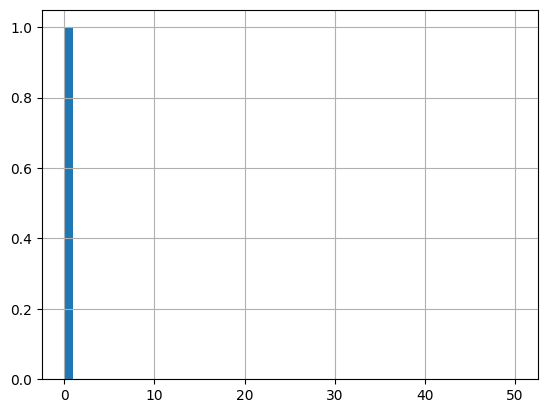

In [54]:
# Histogramme
data_final["fruits-vegetables-nuts_100g"].hist(density=True, bins=50)
plt.title(f"Histogramme de fruits-vegetables-nuts_100g")
plt.show()

Distribution asymétrique la plus part des aliments sont classés dans les premiers bacs. La moyenne et la médiane sont éloignées l'une de l'autre.

Toutes les variables quantitatives ont des modes/moyennes faibles à part quelques produits plus gras comme les huiles.

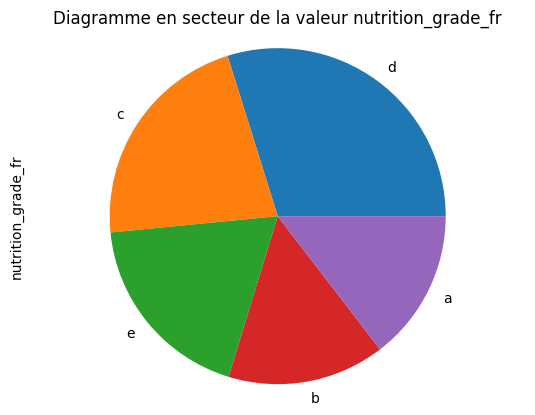

In [94]:
# Diagramme en secteurs
data_final["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.title(f"Diagramme en secteur de la valeur nutrition_grade_fr")
plt.show() # Affiche le graphique

## <a name="C2">4.2 - Analyse bivariée</a>

### <a name="C2">4.2.1 - Régression linéaire</a>

#### <a name="C2">4.2.1.1 - Energie/Fat</a>

In [56]:
Y = data_final['energy_100g']
X = data_final[['fat_100g']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['fat_100g'],result.params['intercept']


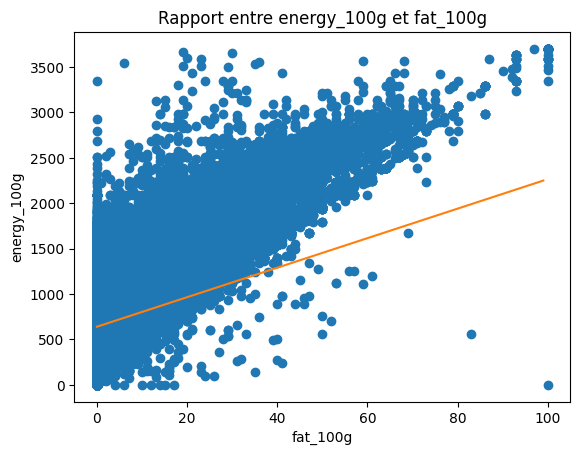

In [93]:
plt.plot(data_final.fat_100g,data_final.energy_100g, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("fat_100g")
plt.ylabel("energy_100g")
plt.title(f"Rapport entre energy_100g et fat_100g")
plt.show()


On s'aperçoit globalement que plus un aliment contient de lipide plus celui-ci sera calorique. Par contre, On voit aussi que la regression linéaire n'est pas complètenment représentative car dans un aliment ce n'est pas seulement les lipides qui contribuent à la quantité d'énergie d'un aliment.

In [58]:
# Calcul de coefficient de Pearson et de la covariance:
Z = data_final['fat_100g']
print(st.pearsonr(Z, Y)[0])
print(np.cov(Z, Y,ddof=0)[1,0])

0.7727746491065441
7560.66130968137


#### <a name="C2">4.2.1.2 - Energie/Carboxy</a>

In [59]:
Y = data_final['energy_100g']
X = data_final[['carbohydrates_100g']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['carbohydrates_100g'],result.params['intercept']

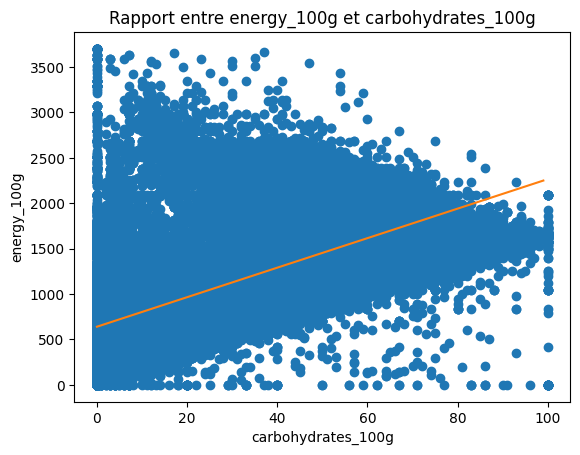

In [60]:
plt.plot(data_final.carbohydrates_100g,data_final.energy_100g, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("carbohydrates_100g")
plt.ylabel("energy_100g")
plt.title(f"Rapport entre energy_100g et carbohydrates_100g")
plt.show()

On s'aperçoit globalement que plus un aliment contient de carboxyhydrate plus celui-ci sera calorique. Par contre, on voit aussi que la regression linéaire n'est pas complètenment représentative car dans un aliment ce n'est pas seulement les carboxyhydrates qui contribuent à la quantité d'énergie d'un aliment. 

### <a name="C2">4.2.2 - ANOVA</a>

In [61]:
X = "nutrition_grade_fr" # qualitative
Y = "energy_100g" # quantitative

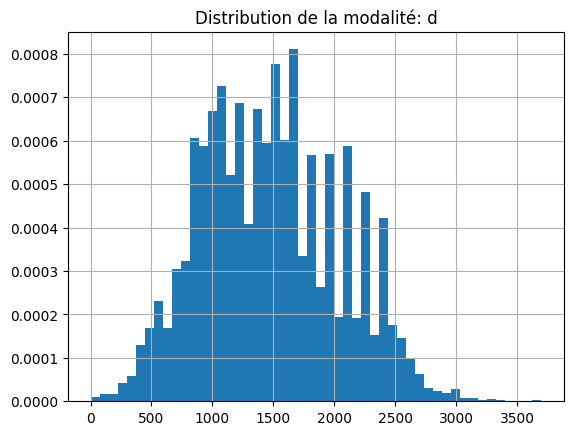

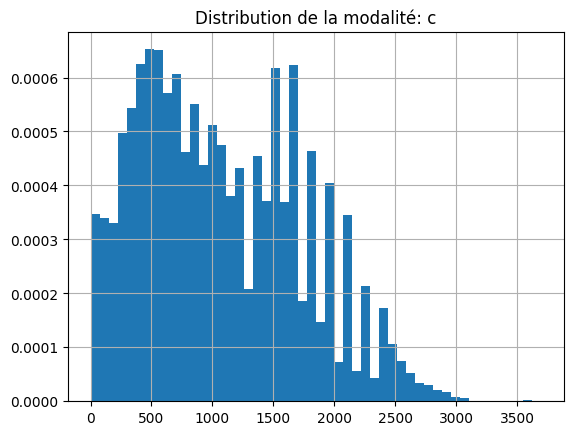

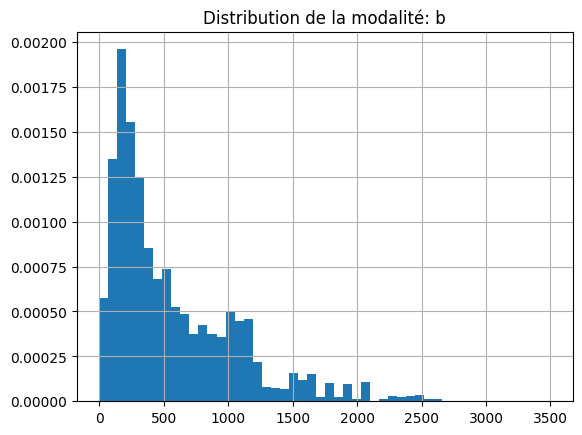

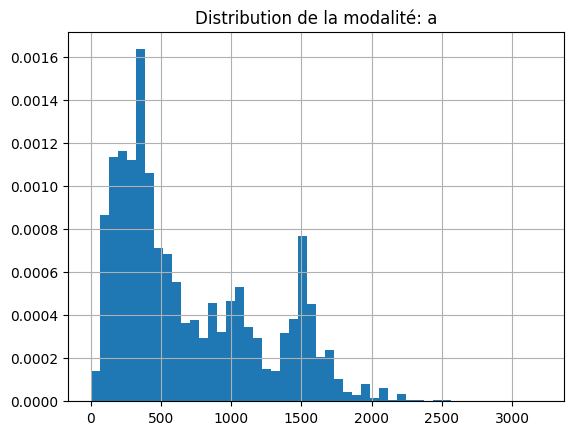

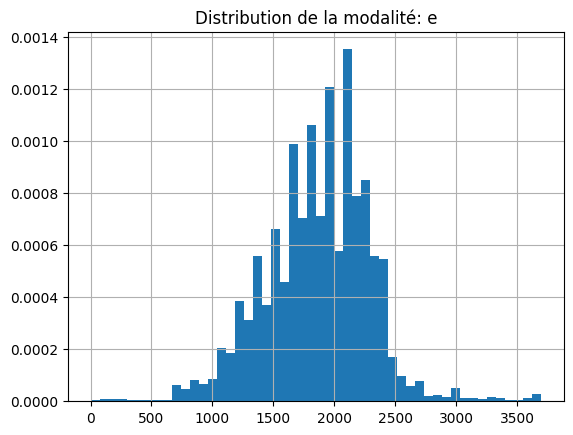

In [63]:
modalites = data_final[X].unique()

groupes = []
for m in modalites:
    plt.title(f"Distribution de la modalité: {m}")
    groupes.append(data_final[data_final[X]==m][Y])
    data_final[data_final[X]==m][Y].hist(density=True, bins=50)
    plt.show()

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

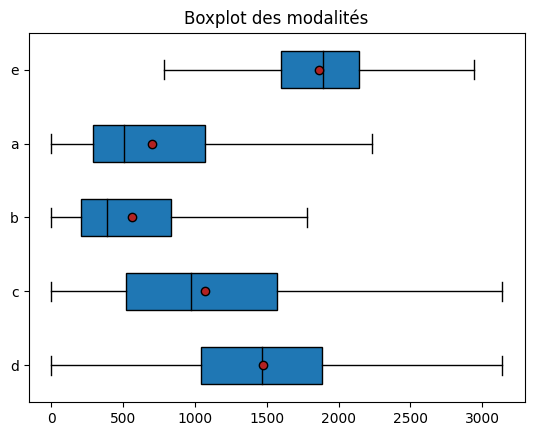

In [65]:
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title(f"Boxplot des modalités")
plt.show()

Les moyennes de chaque groupes sont suffisamment différents pour considérer que les groupes soient différents. Par contre, les groupes D et E sont plus homogènes que les groupes A, B et C.

In [66]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe), 'moyenne_classe': yi_classe.mean()})
        print(f"len: {len(yi_classe)}")
        print(f"moy: {yi_classe.mean()}")
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    print(f"SCT: {SCT}")
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    print(f"SCE: {SCE}")
    return SCE/SCT
    
eta_squared(data_final[X],data_final[Y])

len: 21244
moy: 1475.11254942572
len: 15474
moy: 1071.4561199431305
len: 10790
moy: 565.7879518072289
len: 10381
moy: 700.6812445814469
len: 13335
moy: 1861.0430446194225
SCT: 35997506442.346
SCE: 14613048007.382416


0.40594611826202

### <a name="C2">4.2.3 - Chi-2</a>

#### <a name="C2">4.2.3.1 - Discrétisation</a>

In [67]:
from sklearn.preprocessing import KBinsDiscretizer

#2 variables à discrétiser
data_to_discretize=data_final[["fat_100g", "energy_100g"]]
#Nombre de classes
bins=5

Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="kmeans")
Discretizor.fit_transform(data_to_discretize)

#meilleur vue du résultat
df_disc_kmeans=pd.DataFrame(Discretizor.fit_transform(data_to_discretize),columns=data_to_discretize.columns,dtype="int")
df_disc_kmeans.head()

,fat_100g,energy_100g
0,3,4
1,1,3
2,3,3
3,3,4
4,0,1


In [68]:
Discretizor2=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="quantile")
Discretizor2.fit_transform(data_to_discretize)
#meilleur vue du résultat
df_disc_qt=pd.DataFrame(Discretizor2.fit_transform(data_to_discretize),columns=data_to_discretize.columns,dtype="int")
df_disc_qt.head()

,fat_100g,energy_100g
0,4,4
1,3,3
2,4,4
3,4,4
4,2,2


In [69]:
data_final['Fat dis 3'] = df_disc_qt['fat_100g']
data_final.head()

,sugars_100g,sodium_100g,salt_100g,energy_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,code,product_name,additives_n,ingredients_from_palm_oil_n,calcium_100g,iron_100g,nutrition-score-fr_100g,Nutrition Score calculé,Fat dis 3
3,4,0,1,2540,57,18,5,18,7,0,d,0000000016087,Organic Salted Nut Mix,0.0,0.0,0.143,0.00514,12.0,2,4.0
7,16,0,0,1833,19,58,5,14,9,0,c,0000000016124,Organic Muesli,2.0,0.0,0.062,0.00422,7.0,2,2.0
12,3,1,2,2230,37,37,5,17,7,0,d,0000000016872,Zen Party Mix,1.0,0.0,0.133,0.00360,12.0,0,3.0
16,3,0,0,2632,57,17,3,13,10,0,b,0000000018050,Organic Hazelnuts,0.0,0.0,0.107,0.00450,0.0,0,4.0
19,2,0,0,1096,6,67,1,17,9,0,a,0000000018227,Organic Oat Groats,0.0,0.0,0.048,0.00429,-6.0,-6,2.0


#### <a name="C2">4.2.3.2 - Chi-2</a>

In [70]:
data_final['Fat dis 2'] = df_disc_kmeans['fat_100g']
data_final.head()

,sugars_100g,sodium_100g,salt_100g,energy_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts_100g,...,code,product_name,additives_n,ingredients_from_palm_oil_n,calcium_100g,iron_100g,nutrition-score-fr_100g,Nutrition Score calculé,Fat dis 3,Fat dis 2
3,4,0,1,2540,57,18,5,18,7,0,...,0000000016087,Organic Salted Nut Mix,0.0,0.0,0.143,0.00514,12.0,2,4.0,3.0
7,16,0,0,1833,19,58,5,14,9,0,...,0000000016124,Organic Muesli,2.0,0.0,0.062,0.00422,7.0,2,2.0,1.0
12,3,1,2,2230,37,37,5,17,7,0,...,0000000016872,Zen Party Mix,1.0,0.0,0.133,0.00360,12.0,0,3.0,1.0
16,3,0,0,2632,57,17,3,13,10,0,...,0000000018050,Organic Hazelnuts,0.0,0.0,0.107,0.00450,0.0,0,4.0,2.0
19,2,0,0,1096,6,67,1,17,9,0,...,0000000018227,Organic Oat Groats,0.0,0.0,0.048,0.00429,-6.0,-6,2.0,1.0


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

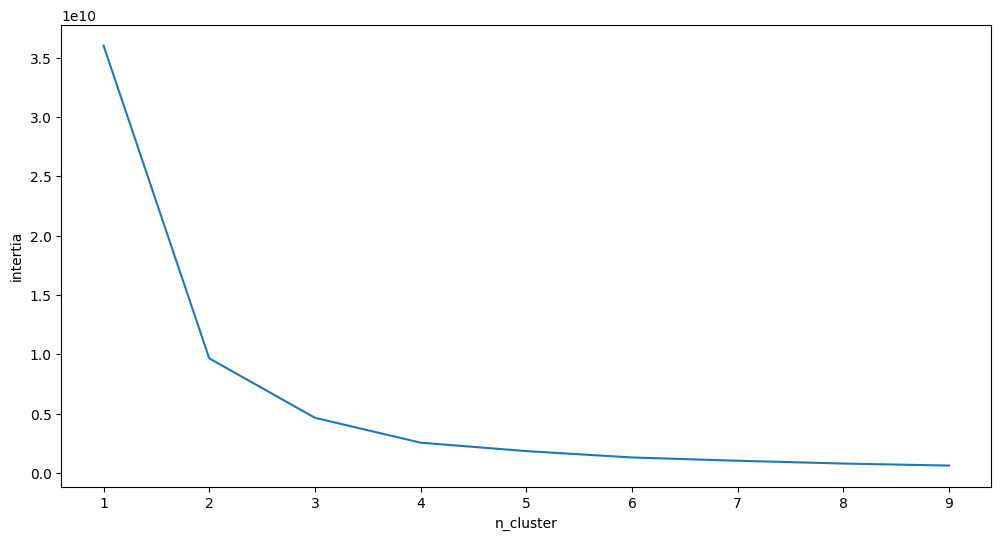

In [71]:
data_kmeans_disc = data_final[['energy_100g', 'fat_100g']]

# Une liste vide pour enregistrer les inerties :  
intertia_list2 = [ ]

# Notre liste de nombres de clusters : 
k_list2 = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list2 : 

# On instancie un k-means pour k clusters
#kmeans = KMeans(n_clusters=k)
  kmeans_disc = KMeans(n_clusters=k)

# On entraine
  kmeans_disc.fit(data_kmeans_disc)

# On enregistre l'inertie obtenue : 
  intertia_list2.append(kmeans_disc.inertia_)

fig2, ax2 = plt.subplots(1,1,figsize=(12,6))

ax2.set_ylabel("intertia")
ax2.set_xlabel("n_cluster")

ax2 = plt.plot(k_list2, intertia_list2)

In [72]:
X = "nutrition_grade_fr"
Y = "Fat dis 2"

cont = data_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

Fat dis 2,0.0,1.0,2.0,3.0,4.0,Total
nutrition_grade_fr,,,,,,
a,1859,907,541,248,29,3584
b,1804,1036,559,232,30,3661
c,2596,1373,798,299,32,5098
d,3821,1770,1140,439,54,7224
e,2490,1224,647,267,26,4654
Total,12570,6310,3685,1485,171,24221


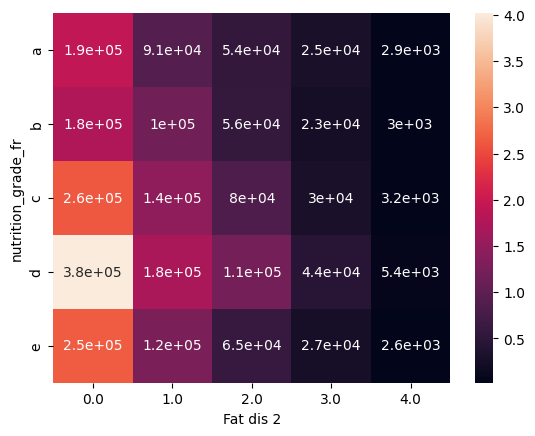

In [73]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_final)
indep = tx.dot(ty) / n

c = 100 * cont.fillna(0) # On remplace les valeurs nulles par 0
measure = ((c-indep)**2/indep)
xi_n = measure.sum().sum()
table = 100 * measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()


Toutes les valeurs du tableau sont inférieurs à 5% il y a donc une dépendance entre Les lipides et la valeur du nutrition grade.

## <a name="C2">4.3 - Analyse multivariée</a>

## <a name="C2">4.3. - K-means</a>

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

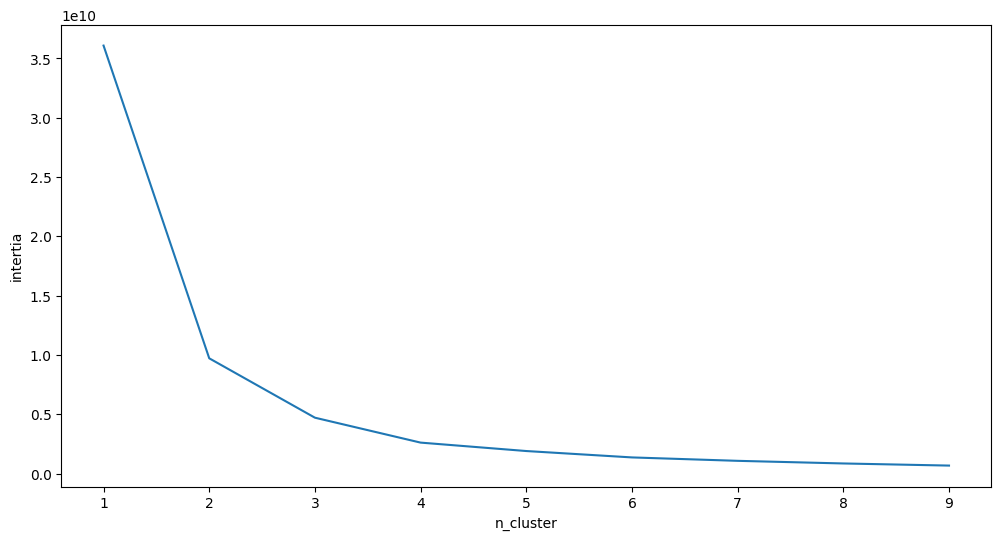

In [74]:
data_kmeans = data_final[['sugars_100g', 'sodium_100g', 'salt_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g']]

# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 

# On instancie un k-means pour k clusters
#kmeans = KMeans(n_clusters=k)
  kmeans = KMeans(n_clusters=k)

# On entraine
  kmeans.fit(data_kmeans)

# On enregistre l'inertie obtenue : 
  intertia_list.append(kmeans.inertia_)

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)


## <a name="C2">4.3.1 - ACP</a>

In [75]:
data_num = data_final[['sugars_100g', 'sodium_100g', 'salt_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g']]

X = data_num.values
names = data_num.index
features = data_num.columns

scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [76]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.62306085, -0.38443129, -0.08603793,  1.87215632,  3.19126918,
        -0.66245442,  0.06662862,  1.43369508,  1.07790959, -0.00714356],
       [ 0.04465736, -0.38443129, -0.52450139,  0.87767556,  0.43005746,
         0.8929694 ,  0.06662862,  0.88505837,  1.5979235 , -0.00714356],
       [-0.67870404,  0.5543582 ,  0.35242553,  1.43610393,  1.73799985,
         0.07637189,  0.06662862,  1.29653591,  1.07790959, -0.00714356],
       [-0.67870404, -0.38443129, -0.52450139,  2.00156541,  3.19126918,
        -0.70134002, -0.25645112,  0.7478992 ,  1.85793045, -0.00714356],
       [-0.73434722, -0.38443129, -0.52450139, -0.15900382, -0.51456761,
         1.24293976, -0.57953086,  1.29653591,  1.5979235 , -0.00714356]])

In [77]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [78]:
n_components = 6
pca = PCA(n_components=n_components)

In [79]:
pca.fit(X_scaled)

PCA(n_components=6)

In [80]:
pca.explained_variance_ratio_

array([0.28079695, 0.19663385, 0.15911413, 0.11854917, 0.09998833,
       0.06387958])

In [81]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([28.08, 19.66, 15.91, 11.85, 10.  ,  6.39])

In [82]:
scree_cum = scree.cumsum().round()
scree_cum

array([28., 48., 64., 75., 85., 92.])

In [83]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

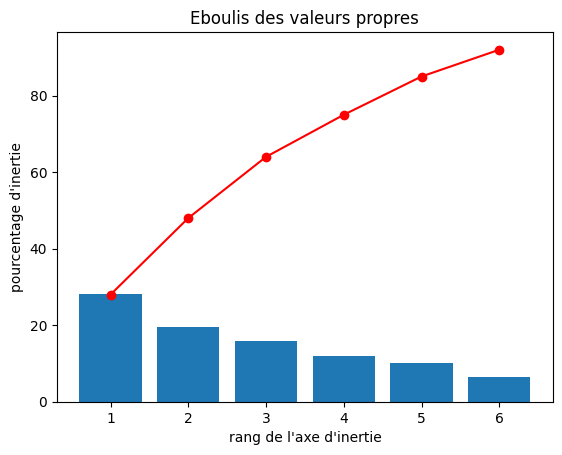

In [84]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [85]:
pcs = pca.components_
pcs

array([[ 3.07246461e-01, -6.73038804e-02, -6.46553099e-02,
         5.67164687e-01,  4.64043910e-01,  3.33807185e-01,
         4.32077440e-01,  1.32139537e-01,  2.10457289e-01,
        -2.38313735e-03],
       [-2.85102217e-01,  6.10631724e-01,  6.11207198e-01,
         1.02946297e-01,  1.58141224e-01, -1.28811930e-01,
         3.89366846e-02,  3.32662470e-01,  8.85732387e-02,
        -6.83245139e-03],
       [ 4.53366310e-01,  3.04416793e-01,  3.11342063e-01,
         3.03006163e-02, -3.34202707e-01,  5.52906193e-01,
        -2.40286615e-01, -3.57843569e-01,  2.74021142e-02,
         3.69203938e-04],
       [-1.94661721e-01, -1.49061951e-01, -1.34039553e-01,
         6.47096023e-02, -2.02641892e-01,  2.15412712e-01,
        -4.05654782e-01,  3.65715192e-01,  7.29066874e-01,
        -2.06187108e-02],
       [-9.28990973e-03,  1.28784080e-03,  5.14482834e-04,
         3.61930013e-03, -9.08848173e-04,  6.39074850e-03,
        -6.54008322e-03,  7.47439591e-03,  1.63009465e-02,
         9.

In [86]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.307246,-0.067304,-0.064655,0.567165,0.464044,0.333807,0.432077,0.132140,0.210457,-0.002383
1,-0.285102,0.610632,0.611207,0.102946,0.158141,-0.128812,0.038937,0.332662,0.088573,-0.006832
2,0.453366,0.304417,0.311342,0.030301,-0.334203,0.552906,-0.240287,-0.357844,0.027402,0.000369
3,-0.194662,-0.149062,-0.134040,0.064710,-0.202642,0.215413,-0.405655,0.365715,0.729067,-0.020619
4,-0.009290,0.001288,0.000514,0.003619,-0.000909,0.006391,-0.006540,0.007474,0.016301,0.999746
5,-0.242010,0.068644,0.051499,-0.049201,0.228002,-0.182602,0.124250,-0.745976,0.523824,-0.002962


In [87]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,sugars_100g,sodium_100g,salt_100g,energy_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts_100g
F1,0.31,-0.07,-0.06,0.57,0.46,0.33,0.43,0.13,0.21,-0.00
F2,-0.29,0.61,0.61,0.10,0.16,-0.13,0.04,0.33,0.09,-0.01
F3,0.45,0.30,0.31,0.03,-0.33,0.55,-0.24,-0.36,0.03,0.00
F4,-0.19,-0.15,-0.13,0.06,-0.20,0.22,-0.41,0.37,0.73,-0.02
F5,-0.01,0.00,0.00,0.00,-0.00,0.01,-0.01,0.01,0.02,1.00
F6,-0.24,0.07,0.05,-0.05,0.23,-0.18,0.12,-0.75,0.52,-0.00


In [88]:
pcs.T

,F1,F2,F3,F4,F5,F6
sugars_100g,0.307246,-0.285102,0.453366,-0.194662,-0.009290,-0.242010
sodium_100g,-0.067304,0.610632,0.304417,-0.149062,0.001288,0.068644
salt_100g,-0.064655,0.611207,0.311342,-0.134040,0.000514,0.051499
energy_100g,0.567165,0.102946,0.030301,0.064710,0.003619,-0.049201
fat_100g,0.464044,0.158141,-0.334203,-0.202642,-0.000909,0.228002
carbohydrates_100g,0.333807,-0.128812,0.552906,0.215413,0.006391,-0.182602
saturated-fat_100g,0.432077,0.038937,-0.240287,-0.405655,-0.006540,0.124250
proteins_100g,0.132140,0.332662,-0.357844,0.365715,0.007474,-0.745976
fiber_100g,0.210457,0.088573,0.027402,0.729067,0.016301,0.523824
fruits-vegetables-nuts_100g,-0.002383,-0.006832,0.000369,-0.020619,0.999746,-0.002962


<Axes: >

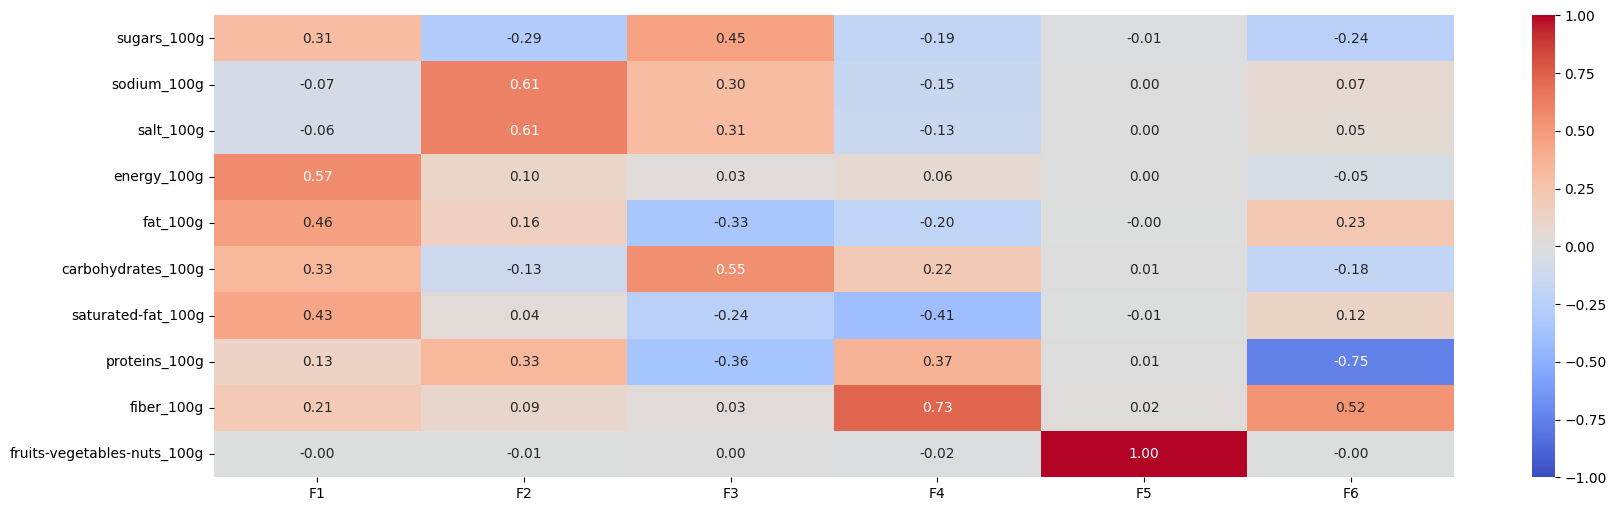

In [89]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [90]:
#x, y = 0,1

In [91]:
def g(x, y):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                0,  # Start the arrow at the origin
                pca.components_[x, i],  #0 for PC1
                pca.components_[y, i],  #1 for PC2
                head_width=0.07,
                head_length=0.07, 
                width=0.02,              )

        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)

In [92]:
interact(g, x=range(5), y=range(5))

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3, 4), value=0), Dropdown(description='y', o…

<function __main__.g(x, y)>

On constate dans tous ces graphes que le sodium et le sel sont très corrélés à F1 et les lipides, l'énergie, les lipides saturés et les fruits-Légumes-noix sont très corrélés à F2